# Experiments

This notebook serves as a playground to experiment with the `sklearn` library to use classic machine learning algorithms.


## Objectives

Your objective here is to achieve the best performance possible on a **subset of [Fashion MNIST](https://openml.org/search?type=data&status=active&id=40996)** by exploring models and their parameters. This dataset is a more complex version of MNIST, with 10 classes of clothes instead of digits. Each sample is a 28x28 grayscale image, which is flattened into a 784-dimensional vector. To reduce the fitting time of the models, we will use only the **2000 first samples** of the dataset to evaluate the methods and train the models. A random part of the rest of the dataset will then be used to evaluate the final model and determine who found the best model. The metric used to compare the models will be the **accuracy**.

This is the main part of the notebook. However, you are **free to explore other things** if you are curious. Here is a non-exhaustive list of things you could try:

- Use different datasets (a few ideas can be found in [Other datasets](#other-datasets))
- Make visualizations of the data
- Make visualizations of the errors of the models
- Make an analysis of the errors of the models
- Use other metrics to compare the models


## Tips

Here are a few tips related to finding the best model:

- A list of all the sklearn algorithms for supervised learning can be found [here](https://scikit-learn.org/stable/supervised_learning.html).
- The most common way to evaluate models is [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html). You can directly use [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) to perform cross-validation on a given model.
- You can also use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to search for the best combinations of parameters. This will perform cross-validation with all the combinations of parameters to find the solution yielding the best results. You can look [here](https://scikit-learn.org/stable/api/sklearn.model_selection.html#hyper-parameter-optimizers) for other hyper-parameters optimizers.
- Other methods related to cross-validation and hyper-parameters tuning can be found in the [`model_selection` module](https://scikit-learn.org/stable/api/sklearn.model_selection.html#splitters)

A few other tips:

- Depending on your preferences, you can use `pandas` or `numpy` to manipulate the data. `pandas` is more high-level and is often easier to use, but `numpy` is more efficient.
- To make visualizations, you can use `matplotlib` or `seaborn`. `seaborn` is more high-level and allows to make nice visualizations easily for data-related topics. `matplotlib` is more flexible and allows to make more complex visualizations. `matplotlib` can also be used to visualize images like the ones in this dataset.
- To learn about the different metrics available in `sklearn`, you can look at this quite exhaustive [article of the user guide](https://scikit-learn.org/stable/modules/model_evaluation.html).


## Some code


In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Import the dataset:


In [2]:
dataset_name = "Fashion-MNIST"
dataset = fetch_openml(dataset_name, version=1)

Select the first 2000 samples:


In [12]:
used_samples = 2000

X: np.ndarray = dataset.data[:used_samples].to_numpy()
y: np.ndarray = dataset.target[:used_samples].to_numpy()

CLASS_NAMES = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
labels, counts = np.unique(y, return_counts=True)
df = pd.DataFrame(
    {"Class Name": [CLASS_NAMES[int(label)] for label in labels], "Count": counts}
)
display(df)

,Class Name,Count
0,T-shirt/top,194
1,Trouser,216
2,Pullover,202
3,Dress,195
4,Coat,186
5,Sandal,200
6,Shirt,194
7,Sneaker,215
8,Bag,198
9,Ankle boot,200


Display what the dataset looks like:


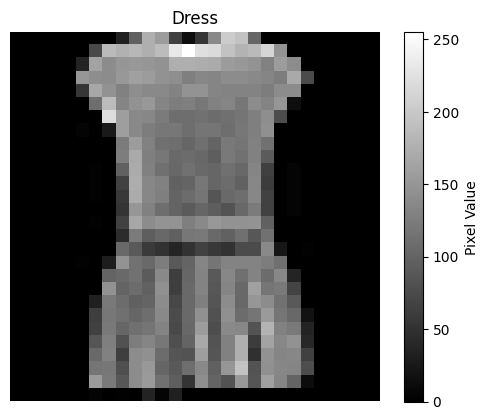

In [4]:
def plot_image(image_data: pd.DataFrame | np.ndarray, label: int) -> None:
    if isinstance(image_data, pd.Series):
        image = image_data.to_numpy().reshape(28, 28)
    elif isinstance(image_data, np.ndarray):
        image = image_data.reshape(28, 28)
    else:
        raise TypeError(
            f"image_data must be a pandas DataFrame or a numpy array, not {type(image_data)}"
        )
    plt.imshow(image, cmap="gray")
    plt.colorbar(label="Pixel Value")
    plt.title(CLASS_NAMES[label])
    plt.axis("off")


index = 3
plot_image(X[index], int(y[index]))

## Your turn


In [5]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from typing import Any, Dict
from sklearn.preprocessing import StandardScaler


def test_method(
    classifier_class,
    X: np.ndarray,
    y: np.ndarray,
    parameters_grid: Dict[str, Any],
    scale: bool,
):
    if scale:
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

    # Set a fixed cross-validation strategy for reproducibility
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Exhaustive search for the best hyperparameters
    search = GridSearchCV(
        classifier_class,
        parameters_grid,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2,
    )
    search.fit(X, y)

    print(f"Best parameters: {search.best_params_}")
    print(f"Best score: {search.best_score_}")
    return search

In [6]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# method = RandomForestClassifier()
# parameters = {
#     "n_estimators": [10, 20, 100, 200, 500],
#     "max_depth": [None, 10, 20, 100, 200, 500],
#     "max_features": ["sqrt", "log2"],
# }
method = SVC()
parameters = {
    "C": [1, 3, 10, 20, 50, 100],
    "kernel": ["rbf"],
    "gamma": ["scale", 0.0001, 0.001, 0.01, 0.1],
}

search = test_method(method, X, y, parameters, scale=True)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.2s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.5s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.6s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   3.7s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   4.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   4.2s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   4.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   4.1s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=   2.5s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   2.7s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   3.0s
[CV] END ......................C=1, gamma=0.000

/home/alexandre/Documents/Geodan/ML-Course/notebooks/.venv/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Best score: 0.8480000000000001


In [7]:
from os import path

search_df = pd.DataFrame(search.cv_results_)
file_name = f"results_{method.__class__.__name__}_0.csv"
while path.exists(file_name):
    file_name_number = int(file_name.split("_")[-1].split(".")[0])
    file_name_number += 1
    file_name = f"results_{method.__class__.__name__}_{file_name_number}.csv"
search_df.to_csv(file_name, index=False)

SVC(C=10, gamma=0.001)
['4' '7' '1' ... '9' '1' '1']


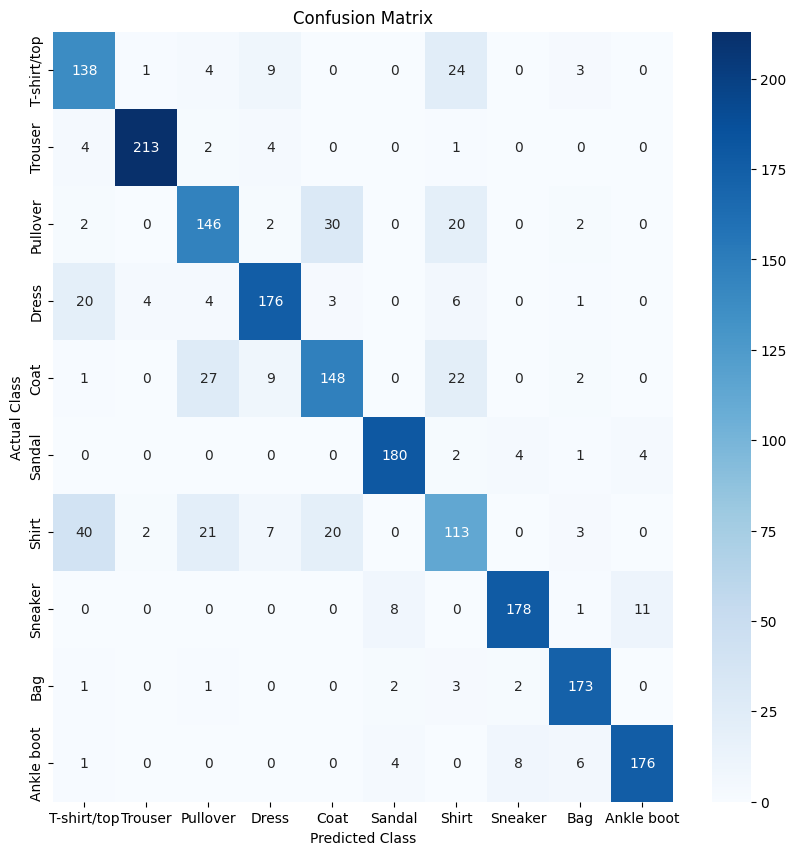

In [ ]:
from utils import plot_confusion_matrix, plot_evaluation

X_test: np.ndarray = dataset.data[used_samples : 2 * used_samples].to_numpy()
y_test: np.ndarray = dataset.target[used_samples : 2 * used_samples].to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
search.best_estimator_.fit(X_scaled, y)
print(search.best_estimator_)
X_test_scaled = scaler.transform(X_test)
y_pred = search.best_estimator_.predict(X_test_scaled)
print(y_pred)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_confusion_matrix(y_test, y_pred, CLASS_NAMES, ax=ax)

## Other datasets

sklearn provides several various datasets that we can use to experiment on the performance of different models, with various complexities and sizes. They can be found [here](https://scikit-learn.org/stable/api/sklearn.datasets.html). The datasets of interest for us are the following:

| Name                      | Link                                                                                                                                            | Targets            | Features | Dimensionality | Samples |
| ------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- | ------------------ | -------- | -------------- | ------- |
| Breast Cancer Wisconsin   | [`sklearn.datasets.load_breast_cancer`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)             | Classification (2) | Real     | 30             | 569     |
| Wine Quality              | [`sklearn.datasets.load_wine`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)                               | Classification (3) | Real     | 13             | 178     |
| California Housing Prices | [`sklearn.datasets.fetch_california_housing`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) | Regression         | Real     | 8              | 20640   |

If you are really interested in image processing, there also exist many variations of MNIST that introduce more complexity:

| Name                                                                                    | Specificity                         | Classes | Features Type  | Dimensionality | Samples               |
| --------------------------------------------------------------------------------------- | ----------------------------------- | ------- | -------------- | -------------- | --------------------- |
| [MNIST](https://openml.org/search?type=data&status=active&id=554)                       | N/A                                 | 10      | Integers 0-255 | 784 (28×28)    | 70000 (60000 + 10000) |
| [Fashion MNIST](https://openml.org/search?type=data&status=active&id=40996)             | Clothes                             | 10      | Integers 0-255 | 784 (28×28)    | 70000 (60000 + 10000) |
| [KMNIST](https://openml.org/search?type=data&status=active&id=41982)                    | Japanese characters                 | 10      | Integers 0-255 | 784 (28×28)    | 70000 (60000 + 10000) |
| [EMNIST Balanced](https://openml.org/search?type=data&status=active&id=41039)           | Digits and letters                  | 47      | Integers 0-255 | 784 (28×28)    | 131600                |
| [QMNIST](https://github.com/facebookresearch/qmnist)                                    | Higher quality with improved labels | 10      | Integers 0-255 | 784 (28×28)    | 60000                 |
| [NotMNIST](https://huggingface.co/datasets/anubhavmaity/notMNIST)                       | Letters a-j with various fonts      | 10      | Integers 0-255 | 784 (28×28)    | 529114                |
| [MNIST-C](https://github.com/google-research/mnist-c)                                   | Various types of corruptions        | 10      | Integers 0-255 | 784 (28×28)    | 60000                 |
| [Sign Language MNIST](https://openml.org/search?type=data&status=active&id=45082)       | Sign language                       | 24      | Integers 0-255 | 784 (28×28)    | 34627 (27455 + 7172)  |
| [Street View House Numbers](https://openml.org/search?type=data&status=active&id=41081) | House numbers                       | 10      | Integers 0-255 | 3072 (32×32×3) | 99289                 |
